In [1]:
# Importing the libraries which will be used

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormaps

%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms

In [2]:
transform_list = transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean=[0.0], std=[1.0,]) ] )

In [3]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_list)

C:\Users\User\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


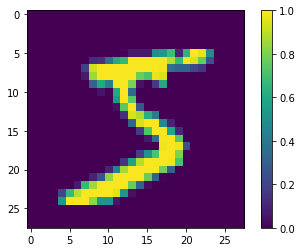

In [4]:
plt.imshow( mnist_trainset[0][0].view(28,28).numpy() )
plt.colorbar()

In [5]:
mnist_trainset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [6]:
mnist_trainset[0][1]

5

In [ ]:
# The data doesn't look right with normalization 0,1 but rather with a mean and standard deviation of 0 and 1

In [11]:
# Setup a small training set 

mnist_trainset_small =  [ mnist_trainset[i] for i in range(0,6000) ] 

In [12]:
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_list)

In [13]:
len( mnist_trainset )

60000

In [ ]:
# As we can notice the training set consists of 60000 pairs- image and digit

In [14]:
# Check the data

im0 = mnist_trainset[0][0]

im0.shape

torch.Size([1, 28, 28])

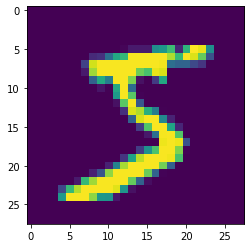

In [15]:
# Visualize it 

plt.imshow( im0.reshape(28,28).numpy())

In [23]:
# Let's check more digits by creating a plot function 

def plot_images(images_to_plot, titles=None, ncols=6, thefigsize=(10,10)):
    
    n_images = images_to_plot.shape[0]
    
    nrows = np.ceil(n_images/ncols).astype(int)
    
    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten() # we can number the axes from 0 upwards with a single integer

    for i in range(n_images):
        ax[i].imshow( images_to_plot[i,0,:,:].reshape(28,28), cmap=cm.Greys ) 
            # cmap=cm.Greys plots in Grey scale so the image looks as if it were written
        ax[i].axis('off')  
        if titles is not None:
            ax[i].set_title(titles[i])

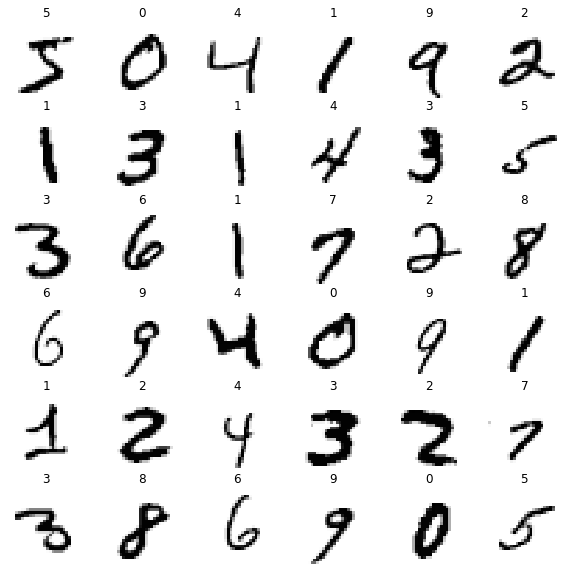

In [24]:
images_to_plot = np.array( [ mnist_trainset_small[i][0].numpy() for i in range(0,36)])
titles = [ mnist_trainset_small[i][1] for i in range(0,36) ] 
plot_images( images_to_plot, titles)

In [ ]:
# We can notice how different the digits look making the classification hard to achieve 